# Train and evaluate ResNet23

In [1]:
from pathlib import Path
from resnet23 import ResNet23
from dataset import Dataset
import matplotlib.pyplot as plt
import cv2
from data_preparation import gaussian_kernel

Using TensorFlow backend.


## Load model and data

In [3]:
# Import model and dataset
resnet23 = ResNet23()
data = Dataset(r"D:\Nabil_object_detection\data\resnet23_data\lensfree")

In [4]:
# Split dataset into train and validation images.
# Dataset class supports random split over all images or leaving out certain experiments. (See function __doc__ for more info).

# Taking 20% of the images as validation images:
# train_ids, val_ids = data.split_data(0.2)

# Taking out a single experiment (nrk_experiment) as validation data
train_ids, val_ids = data.split_data("nrk_experiment")

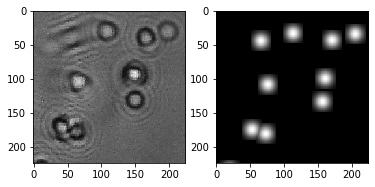

In [5]:
# Show example data
img, pm = data[train_ids[0]]

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(pm, cmap="gray")
plt.show()

## Train model

In [12]:
history = resnet23.train(train=data.generate_train_data(batch_size=1),
                         val=data.generate_val_data(batch_size=1),
                         steps_per_epoch=100,
                         validation_steps=10,
                         epochs=20)

Epoch 1/20
100/100 [==============================] - 20s 201ms/step - loss: 0.1710 - val_loss: 0.1730
Epoch 2/20
100/100 [==============================] - 21s 213ms/step - loss: 0.1384 - val_loss: 0.6671
Epoch 3/20
100/100 [==============================] - 22s 217ms/step - loss: 0.1370 - val_loss: 0.1892
Epoch 4/20
100/100 [==============================] - 22s 222ms/step - loss: 0.1501 - val_loss: 0.6880
Epoch 5/20
100/100 [==============================] - 23s 229ms/step - loss: 0.1516 - val_loss: 0.1812
Epoch 6/20
100/100 [==============================] - 23s 234ms/step - loss: 0.1316 - val_loss: 0.3860
Epoch 7/20
100/100 [==============================] - 24s 240ms/step - loss: 0.1239 - val_loss: 0.2214
Epoch 8/20
100/100 [==============================] - 24s 245ms/step - loss: 0.1252 - val_loss: 0.5508
Epoch 9/20
100/100 [==============================] - 25s 250ms/step - loss: 0.1432 - val_loss: 0.1746
Epoch 10/20
100/100 [==============================] - 25s 253ms/step - l

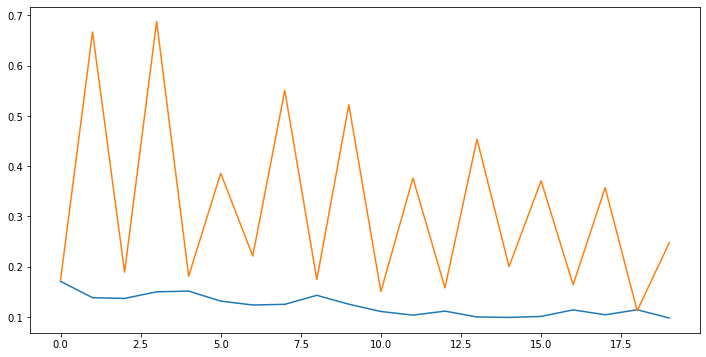

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.show()

In [14]:
# Predict on example training image
img, pm = data[train_ids[0]]
out = resnet23.predict(img)

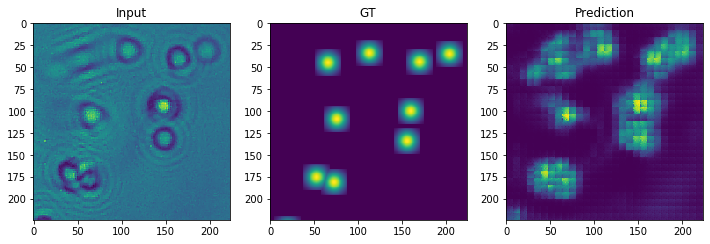

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("Input")
plt.imshow(img)
plt.subplot(132)
plt.title("GT")
plt.imshow(pm)
plt.subplot(133)
plt.title("Prediction")
plt.imshow(out)
plt.show()

In [ ]:
# Predict on example training image
img, pm = data[train_ids[0]]
out = resnet23.predict(img)